In [46]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
from scipy.stats import norm
from scipy import stats


In [10]:
## Load the dataset into a pandas DataFrame and display the first 5 rows


data= pd.read_csv('E_Commerce.csv', encoding= 'unicode_escape')
data.head()

,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
# Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.)

data.describe()

,ï»¿ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
# Identify and handle missing values. Explain the chosen method for handling them.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿ID                10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
# Hence no missing values and duplicate values

In [10]:
data.isnull().sum()

ï»¿ID                  0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

                        ï»¿ID  Customer_care_calls  Customer_rating  \
ï»¿ID                1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ï»¿ID                           0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

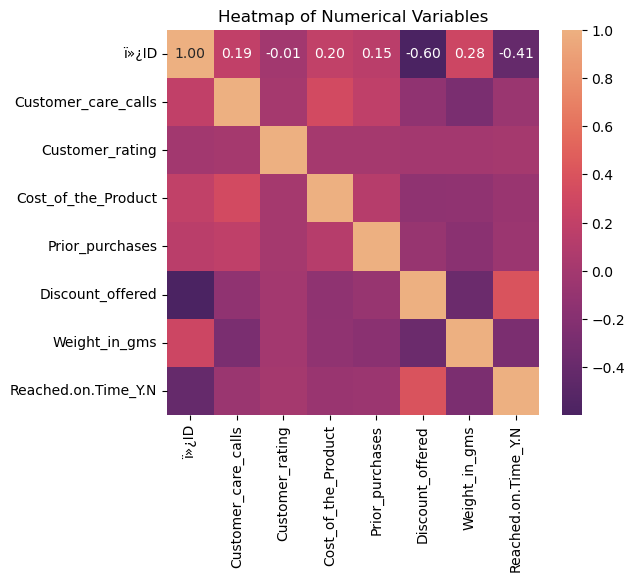

In [12]:
#Creating visualizations to understand the distribution by correlation of numerical features , Generate correlation heatmaps to identify relationships between numerical features.


numerical_features_ss = data.select_dtypes(include=[np.number])
corr_matrix = numerical_features_ss.corr()
print(corr_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='flare_r', fmt=".2f")
plt.title('Heatmap of Numerical Variables')
plt.show()

C:\Users\geeti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\geeti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Cost of the Product')

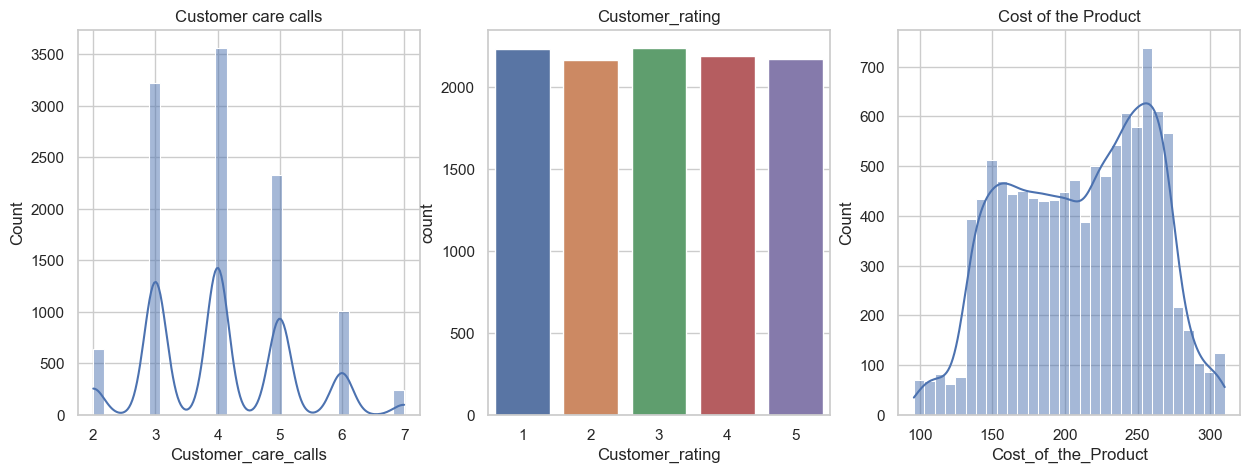

In [44]:
# Create visualizations to understand the distribution of numerical features


fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(data['Customer_care_calls'], ax=ax[0], kde=True).set_title('Customer care calls')
sns.countplot(x = 'Customer_rating', data = data, ax=ax[1]).set_title('Customer_rating')
sns.histplot(data['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')


C:\Users\geeti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\geeti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Reached.on.Time_Y.N')

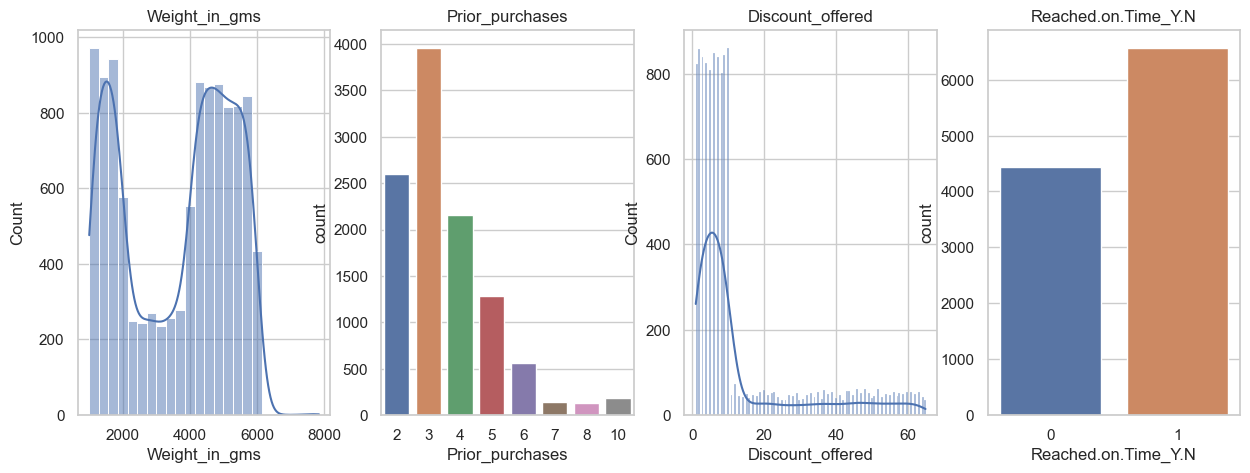

In [45]:
# Create visualizations to understand the distribution of other numerical features

fig, ax = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x = 'Prior_purchases', data = data, ax=ax[1]).set_title('Prior_purchases')
sns.histplot(data['Discount_offered'], ax=ax[2], kde=True).set_title('Discount_offered')
sns.histplot(data['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight_in_gms')
sns.countplot(x = 'Reached.on.Time_Y.N', data = data, ax=ax[3]).set_title('Reached.on.Time_Y.N')

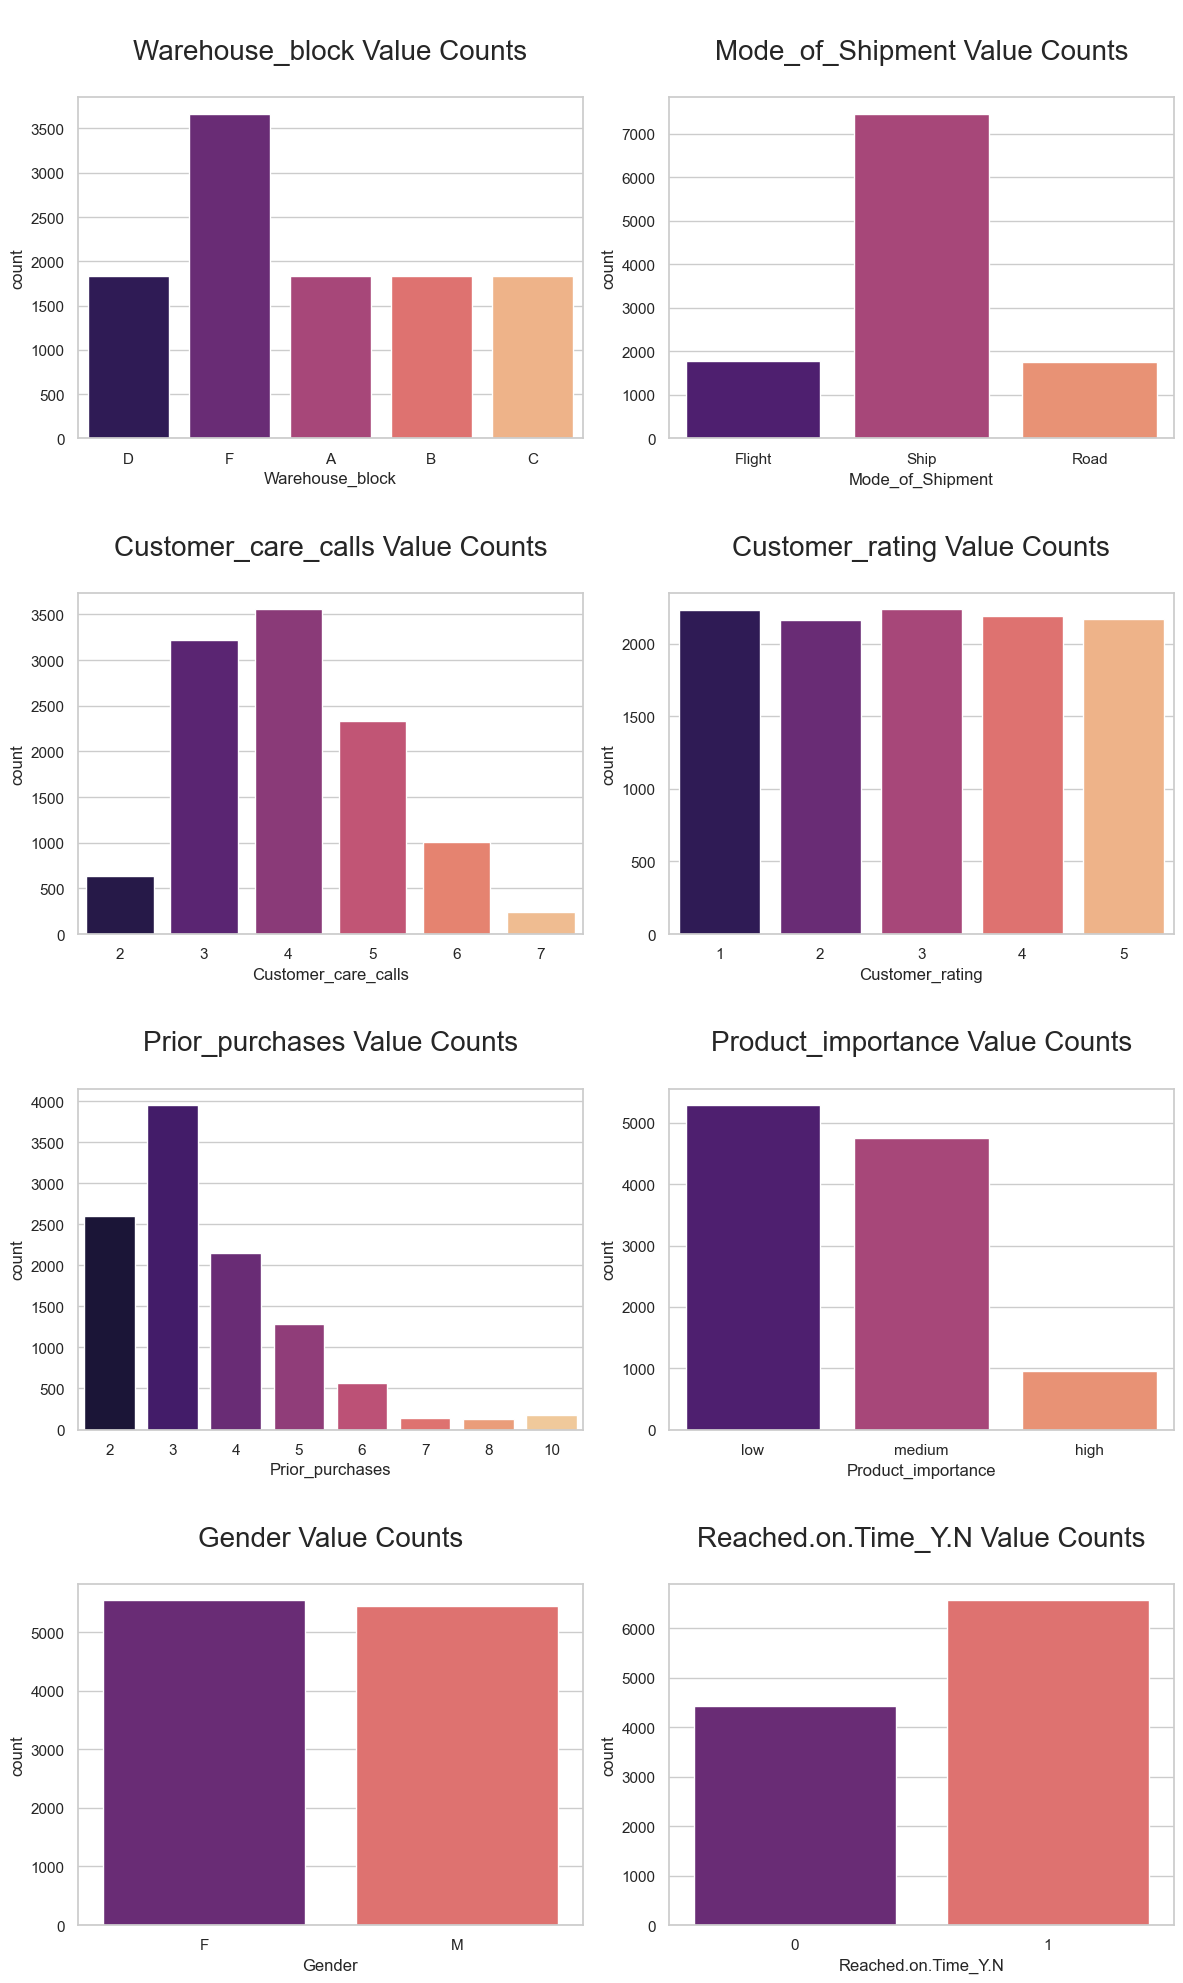

In [50]:
#creating a list of categorical columns and Create visualizations to understand the distribution of categorical features


columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (12, 20))
plotnumber = 1

# plotting a countplot of every categorical column.
for i in range(len(columns)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = columns[i], data = data, ax = ax, palette = 'magma')
        plt.title(f"\n{columns[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

                        ï»¿ID  Customer_care_calls  Customer_rating  \
ï»¿ID                1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ï»¿ID                           0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

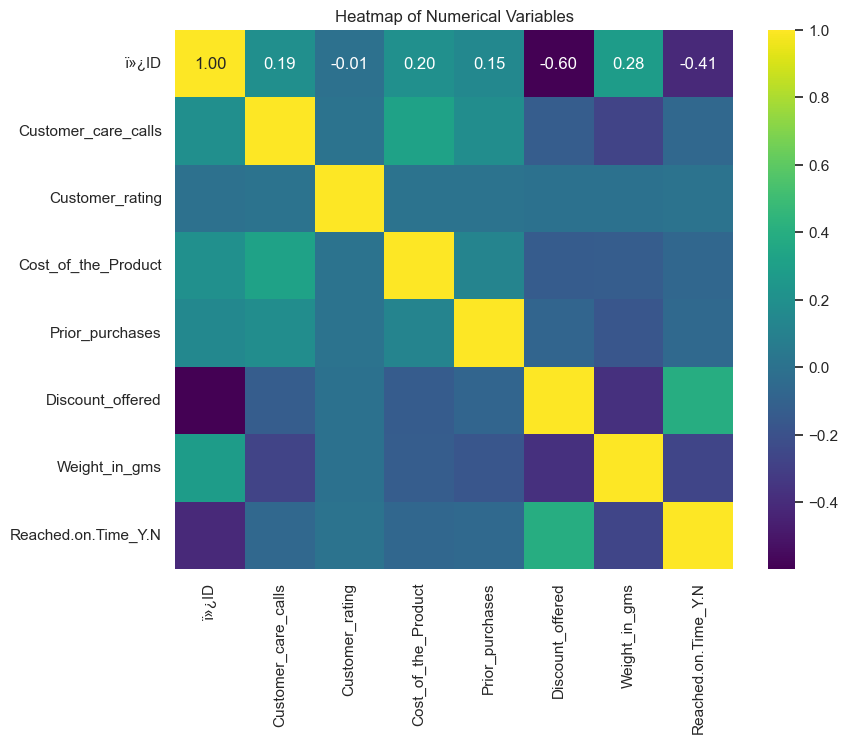

In [51]:
# : Generate correlation heatmaps to identify relationships between numerical features.

numerical_features_ss = data.select_dtypes(include=[np.number])
corr_matrix = numerical_features_ss.corr()
print(corr_matrix)

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Numerical Variables')
plt.show()


In [52]:
#  Using pair plots to visualize relationships between features

AttributeError: 'numpy.int64' object has no attribute 'startswith'

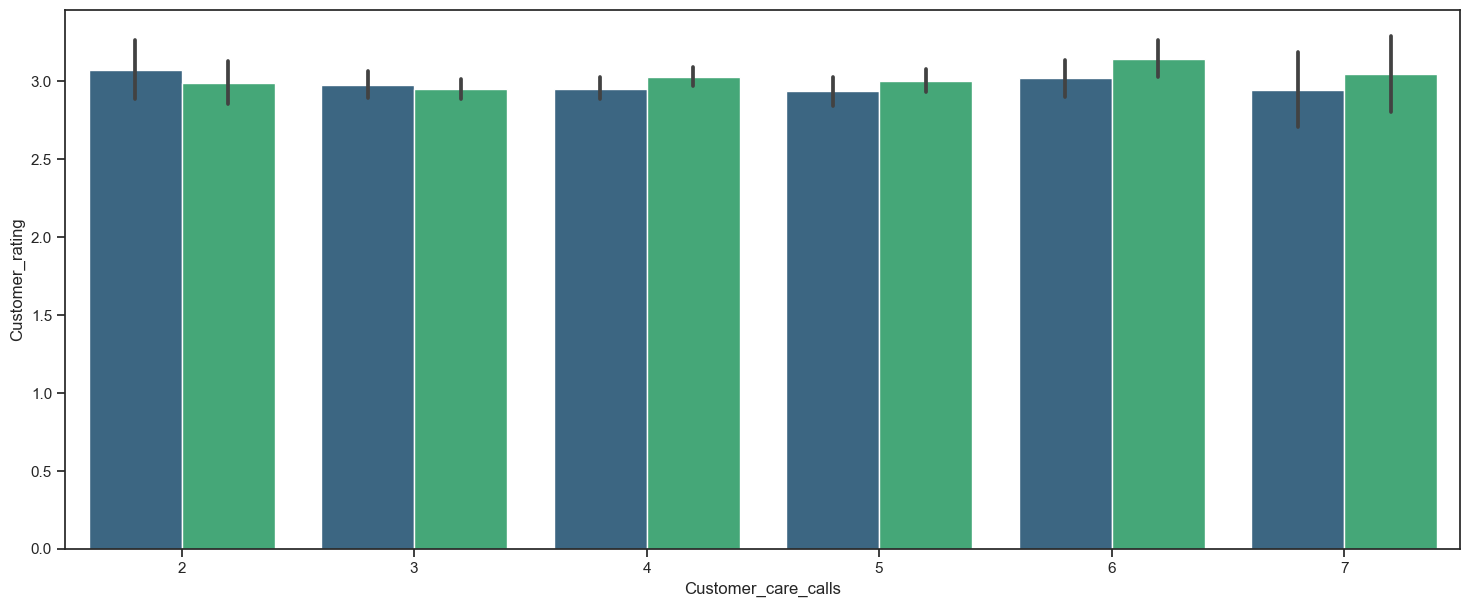

In [22]:
# making a countplot to check if Customer_care_calls, Customer_rating and Reach.on.Time_Y.N are related to one another

plt.figure(figsize = (18, 7))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', data = data, palette = 'viridis')
plt.ylim(0, 5)
plt.show()

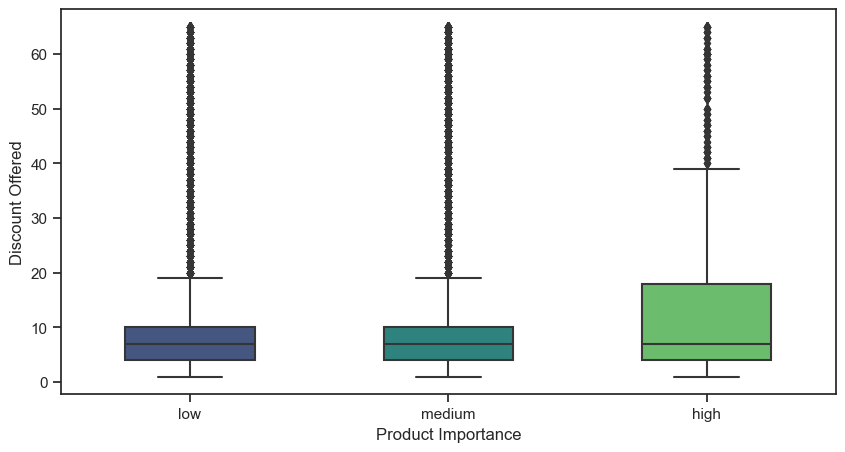

In [54]:
# using a boxplot to explore the relations between Product importance and discount offered

plt.figure(figsize=(10,5))
sns.set(style="ticks")

sns.boxplot(x='Product_importance', y='Discount_offered', data=data, palette='viridis', width=0.5)

plt.xlabel('Product Importance')
plt.ylabel('Discount Offered')

plt.show()

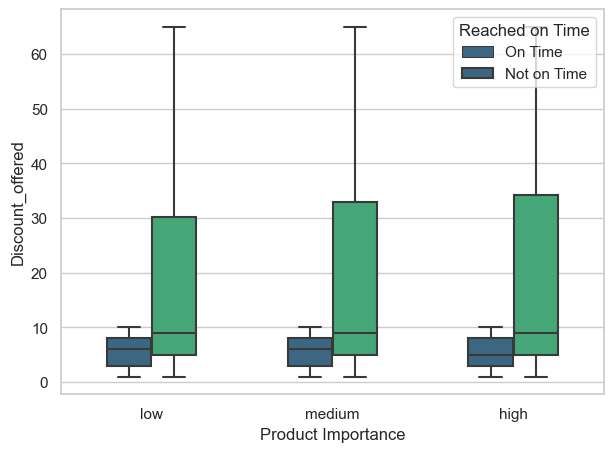

In [53]:
# relating between product importance, discount offered and whether product reaches on time or not

plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")

sns.boxplot(x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', data=data, palette='viridis', width=0.5)

plt.xlabel('Product Importance')
plt.ylabel('Discount_offered')

plt.legend(title='Reached on Time', labels=['On Time', 'Not on Time'])

plt.show()

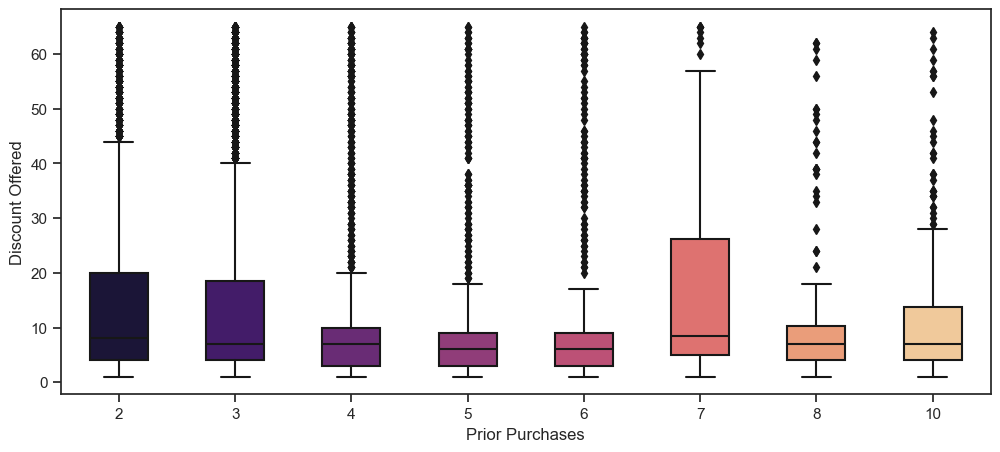

In [27]:
 #using a boxplot to explore the relations between prior purchases and discount offered

plt.figure(figsize=(12, 5))
sns.set(style="ticks")

sns.boxplot(x='Prior_purchases', y='Discount_offered', data=data, palette='magma', width=0.5)

plt.xlabel('Prior Purchases')
plt.ylabel('Discount Offered')

plt.show()

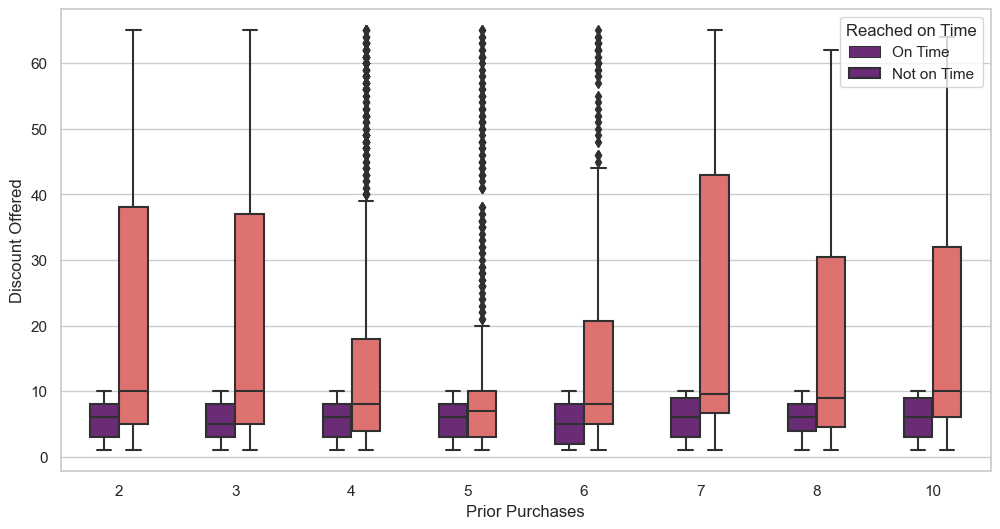

In [28]:
# relating between prior purchases, discount offered and whether product reaches on time or not

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(x='Prior_purchases', y='Discount_offered', hue='Reached.on.Time_Y.N', data=data, palette='magma', width=0.5)

plt.xlabel('Prior Purchases')
plt.ylabel('Discount Offered')

plt.legend(title='Reached on Time', labels=['On Time', 'Not on Time'])

plt.show()

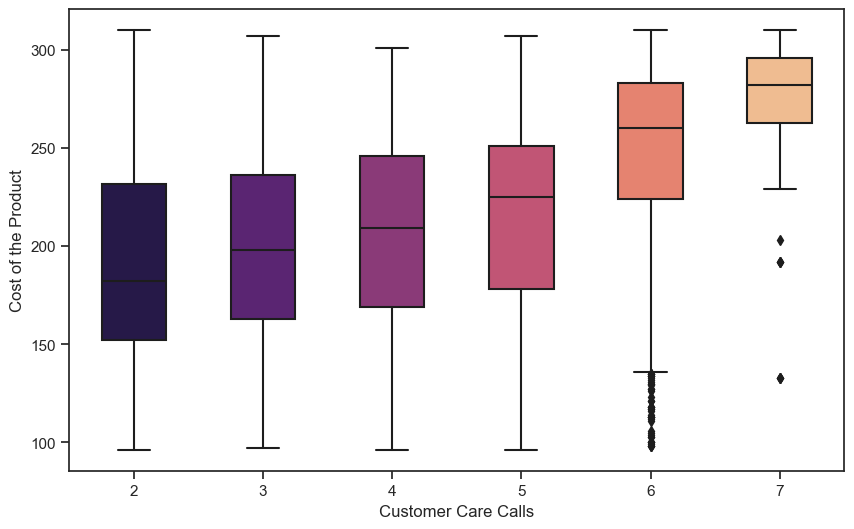

In [57]:
plt.figure(figsize=(10, 6))
sns.set(style="ticks")

sns.boxplot(x='Customer_care_calls', y='Cost_of_the_Product', data=data, palette='magma', width=0.5)

plt.xlabel('Customer Care Calls')
plt.ylabel('Cost of the Product')

plt.show()


In [58]:
# Very new and very old customers are offered more discounts

In [31]:
numeric_col = data.select_dtypes(include=['number'])
corr_matrix = numeric_col.corr()

print(corr_matrix)

                        ï»¿ID  Customer_care_calls  Customer_rating  \
ï»¿ID                1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ï»¿ID                           0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000    

In [32]:
num_columns = data.select_dtypes(include = ['int64'])
num_columns.head()

,ï»¿ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


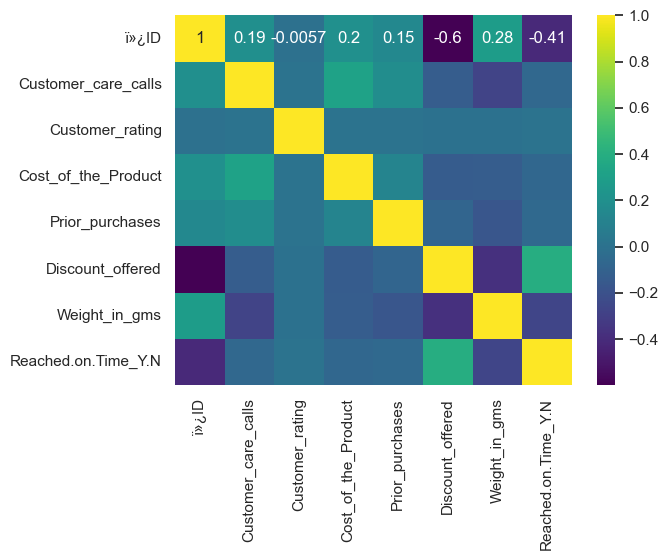

In [36]:
sns.heatmap(num_columns.corr(), annot = True, cmap='viridis')
plt.show()

In [59]:
# Conclusions from Correlation matrix :-

 # // Discount Offered have high positive correlation with Reached on Time or Not of 40%.

# // Customer care calls and cost of the product have positive correlation of 32%.

# // Prior Purchases and Customer care calls have slightly positive correlation.

# // Warehouse block F have has more values than all other Warehouse blocks.

# // In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.

# // Most of the customers calls 3 or 4 times to the customer care centers.

# // Customer Ratings does not have much variation.

# // Most of the customers have 3 prior purchases.

# // We can say that most of the products are of low Importance.

# // Gender Column doesn't have much variance.

# // More products doesn't reach on time than products reached on time.


In [13]:
#iport library for statistic

import statsmodels.stats.api as sms

In [14]:
print(data["Customer_rating"].mode())
print(data["Customer_rating"].max())
print(data["Customer_rating"].min())
print(data["Customer_rating"].mean())
print(sms.DescrStatsW(data["Customer_rating"]).tconfint_mean())

0    3
Name: Customer_rating, dtype: int64
5
1
2.9905445949631786
(2.964123744148295, 3.0169654457780624)


In [15]:
def func(x):
    if x < 2.99:
        return "BAD"
    else:
        return "GOOD"

data["Customer_rating"] = data["Customer_rating"].apply(lambda x: func(x))
print(data["Customer_rating"].value_counts())

Customer_rating
GOOD    6599
BAD     4400
Name: count, dtype: int64


In [17]:
print(data["Discount_offered"].mode())
print(data["Discount_offered"].max())
print(data["Discount_offered"].min())
print(data["Discount_offered"].mean())
print(sms.DescrStatsW(data["Discount_offered"]).tconfint_mean())

0    10
Name: Discount_offered, dtype: int64
65
1
13.37321574688608
(13.070327480886126, 13.676104012886034)


In [18]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

data["Discount_offered"] = data["Discount_offered"].apply(lambda x: funcforD(x))
print(data["Discount_offered"].value_counts())

Discount_offered
LESS        8514
NORMAL      1710
TOO MUCH     775
Name: count, dtype: int64


In [31]:
# Train And Test , Split

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [60]:
X = data.drop(["Reached.on.Time_Y.N"],axis=1)
Y = data["Reached.on.Time_Y.N"]



In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

ValueError: could not convert string to float: 'D'

In [29]:
print(xTest.columns)

Index(['ï»¿ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [30]:
print(yTest)

107      1
5594     1
6997     0
3984     0
3111     1
        ..
6885     0
3909     0
10548    1
10317    1
5649     0
Name: Reached.on.Time_Y.N, Length: 2200, dtype: int64


In [49]:
import numpy as np
import pandas as pd
import itertools
import plotly.express as px

#plotting
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
get_ipython().run_line_magic('matplotlib', 'inline')

#sklearn
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups

#Categorical Values
!pip install category_encoders
import category_encoders as ce

#Split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

#sklearn algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.model_selection import cross_val_score

   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 574.1 kB/s eta 0:00:00


In [48]:
# KNN Classifier

In [56]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Create an ADASYN object
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the dataset
X2, y2 = adasyn.fit_resample(X, y)

# Print class distribution before and after resampling
print("Class distribution before ADASYN:", Counter(y))
print("Class distribution after ADASYN:", Counter(y2))

NameError: name 'X' is not defined

In [50]:
KNC = KNeighborsClassifier()

In [57]:
data2.head()

NameError: name 'data2' is not defined

In [62]:
Train2 = pd.concat([data, Train_encode], axis = 1)
Train2

NameError: name 'Train_encode' is not defined